# Project: Investigate a Dataset – Soccer Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
    <ul><li><a href="#descr">Dataset Description</a></li>
        <li><a href="#ques">Questions for Analysys</a></li>
    </ul>
<li><a href="#wrangle">Data Wrangling</a>
    <ul><li><a href="#assess">Assessing the data</a></li>
    <li><a href="#clean">Data Cleaning</a></li>
    </ul>
</li>   
<li><a href="#explore">Exploratory Data Analysis</a></li>     
<li><a href="#close">Conclusion</a></li> 
<li><a href="#reference">References</a></li> 
</ul>


<a id='intro'></a>
# Introduction

<a id='descr'></a>
## Dataset Description 

The soccer database contains data for soccer matches, teams and players from several European countries from 2008 to 2016, sourced from <a href ="#kaggle.com">kaggle</a>.
The database consists of the following tables:
<ul>
<li>Country - 11 European countries.</li><br>
<li>League - 11 European football leagues.</li><br>
<li>Match - matches played in the 2008 to 2016 seasons <ul><li>with team line up and squad formation for every match</li><li>with game events such as goal types, corner, fouls etc.</li><li>with betting odds information.</li></ul></li><br>
<li>Team - teams in the European football leagues.</li><br>
<li>Team_Attributes - team attributes from the FIFA game series.</li><br>
<li>Player - players in the 2008 to 2016 seasons.</li><br>
<li>Player_Attributes - player attributes from the FIFA game series.</li>
</ul>

<a id='ques'></a>
## Questions for Analysis


1. __What team had the most aggressive defence over the 2008 to 2016 period?__
2. __Which players had the best tackles?__
3. __What player attributes contribute to the highest defence?__
4. __Are the right footed players better defenders?__


In [1]:
#Import all packages to be used. pandas, matplotlib, numpy and seaborn.
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline
import numpy as np

In [2]:
#Establish a SQL connection to the soccer database
connection = sqlite3.connect('soccer.sqlite')

#Cursor cur to perform operations
cur = connection.cursor()

<a id='wrangle'></a>
# Data Wrangling

<a id='assess'></a>
## Assessing the data

In [3]:
#Create function for getting the shape, datatype, duplicate rows, 
# number of unique non null values of a data frame.

def soccer_wrangle(df):
    print("shape: {}".format(df.shape))
    print("# duplicate rows: {}".format(df.duplicated().sum()))
    print("# null values: {}".format(df.isnull().sum().max()))
    print("unique non null values:")
    print(df.nunique())
    print(df.info())

In [4]:
#load country details into a data frame
country_df = pd.read_sql_query('SELECT * FROM Country', connection)
soccer_wrangle(country_df)
country_df

shape: (11, 2)
# duplicate rows: 0
# null values: 0
unique non null values:
id      11
name    11
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes
None


,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [5]:
#load league details into a data frame
league_df = pd.read_sql_query('SELECT * FROM League', connection)
soccer_wrangle(league_df)
league_df

shape: (11, 3)
# duplicate rows: 0
# null values: 0
unique non null values:
id            11
country_id    11
name          11
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes
None


,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [6]:
#load team details into a dataframe
team_df = pd.read_sql_query('SELECT * FROM Team', connection)
soccer_wrangle(team_df)
team_df.head()

shape: (299, 5)
# duplicate rows: 0
# null values: 11
unique non null values:
id                  299
team_api_id         299
team_fifa_api_id    285
team_long_name      296
team_short_name     259
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB
None


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


__Team table__
- There are 11 missing team_fifa_api_id values. 
- The column is also stored as a float

In [55]:
#load team_attributes into a dataframe
team_attributes_df = pd.read_sql_query('SELECT * FROM Team_Attributes', connection)
soccer_wrangle(team_attributes_df)
team_attributes_df.head(100)

ProgrammingError: Cannot operate on a closed database.

In [54]:
#FOR TESTING
team_attributes_df.defenceAggressionClass.unique()

array(['Press', 'Double', 'Contain'], dtype=object)

__Team attributes table__
- There are 288 teams inthe team attributes data set 
- There are 969 missing data on team_attributes
- date is stored as a string
- Column buildUpPlayDribbling has data marked as NaN 

In [8]:
#load player details into a dataframe
player_df = pd.read_sql_query('SELECT * FROM Player', connection)
soccer_wrangle(player_df)
player_df.head()

shape: (11060, 7)
# duplicate rows: 0
# null values: 0
unique non null values:
id                    11060
player_api_id         11060
player_name           10848
player_fifa_api_id    11060
birthday               5762
height                   20
weight                   50
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB
None


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


__Player table__
- There is more than 11 060 players
- birthday is stored as a string
- the weight is stored as type int

In [9]:
#load player_attributes into a dataframe
player_attributes_df = pd.read_sql_query('SELECT * FROM Player_Attributes', connection)
soccer_wrangle(player_attributes_df)
player_attributes_df.head()

shape: (183978, 42)
# duplicate rows: 0
# null values: 3230
unique non null values:
id                     183978
player_fifa_api_id      11062
player_api_id           11060
date                      197
overall_rating             61
potential                  56
preferred_foot              2
attacking_work_rate         8
defensive_work_rate        19
crossing                   95
finishing                  97
heading_accuracy           96
short_passing              95
volleys                    93
dribbling                  97
curve                      92
free_kick_accuracy         97
long_passing               95
ball_control               93
acceleration               86
sprint_speed               85
agility                    81
reactions                  78
balance                    81
shot_power                 96
jumping                    79
stamina                    84
strength                   82
long_shots                 96
aggression                 91
interceptions   

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [10]:
#unique values for attacking_work_rate and defensive_work_rate
print(player_attributes_df.attacking_work_rate.unique())
print(player_attributes_df.defensive_work_rate.unique())

['medium' 'high' None 'low' 'None' 'le' 'norm' 'stoc' 'y']
['medium' 'high' 'low' '_0' None '5' 'ean' 'o' '1' 'ormal' '7' '2' '8' '4'
 'tocky' '0' '3' '6' '9' 'es']


__Player attributes table__
- Player attributes dataset has 3230 missing values
- date is stored as a string
- The numerical attributes have are a rating out of 100 stored as a float
- overall_rating, potential, preferred_foot have missing data
- attacking_work_rate and defensive_work_rate have missing data
- attacking_work_rate and defensive_work_rate can only be rated low,medium or high. The rest of the values are wrong

<a id='clean'></a>
## Data Cleaning

##### Fix data types

In [12]:
#convert the date column in team atrributes to type datetime
team_attributes_df.date = pd.to_datetime(team_attributes_df['date'])

#convert the date column in player atrributes to type datetime
player_attributes_df.date = pd.to_datetime(player_attributes_df['date'])

#convert the birthday column in player to type datetime
player_df.birthday = pd.to_datetime(player_df['birthday'])

In [13]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  11060 non-null  int64         
 1   player_api_id       11060 non-null  int64         
 2   player_name         11060 non-null  object        
 3   player_fifa_api_id  11060 non-null  int64         
 4   birthday            11060 non-null  datetime64[ns]
 5   height              11060 non-null  float64       
 6   weight              11060 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 605.0+ KB


In [14]:
#converting weight type to float in player dataset
player_df['weight'] = player_df['weight'].astype(float)

##### Fix missing values

In [15]:
#use means to fill in missing values
# buildUpPlayDribbling marked as NaN on team attributes dataset.
mean = team_attributes_df.buildUpPlayDribbling.mean()
team_attributes_df['buildUpPlayDribbling'].fillna(mean, inplace = True)

In [16]:
team_attributes_df.buildUpPlayDribbling.isnull().sum()

0

##### Drop rows with missing values

In [17]:
#drop columns that are irrelevant to analysing the team defence
#in the datasets: match, team attributes

#drop team_fifa_api_id in team
#team_df.drop(team_fifa_api_id, axis = 1, inplace=True)

In [18]:
#drop rows with at least 1 missing value in player_attributes_df
player_attributes_df.dropna(axis = 0, how ='any', inplace=True)

##### Fix errors 

In [19]:
#fix errors in attacking_work_rate and defensive_work_rate columns in player_attributes_df

def fix_error(df, col):
    list1 = ['low', 'medium', 'high']
    for player_id in df.index: 
        x = df.loc[player_id, col]
        
        if str(x) not in list1:
            df.loc[player_id, col] = 'unknown'
            

In [20]:
fix_error(player_attributes_df, 'attacking_work_rate')

In [21]:
fix_error(player_attributes_df, 'defensive_work_rate')

In [22]:
#FOR TESTING
player_attributes_df['defensive_work_rate'].isnull().sum()

0

In [23]:
#FOR TESTING
mask_work_rate2 = player_attributes_df['defensive_work_rate'] == '1'
player_attributes_df[mask_work_rate2]

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes


<a id='explore'></a>
# Exploratory Data Analysis

### Q1: What team had the most aggressive defence over the 2008 to 2016 period?

In [24]:
#team_attributes_df summary stats.
team_attributes_df.describe()

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,39179.857739,13264.869900,11.545869,5.601170,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1.000000,1601.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,110.000000,8457.750000,45.000000,48.607362,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,485.000000,8674.000000,52.000000,48.607362,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,48.607362,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,112513.000000,274581.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


In [25]:
#group by average per team for all seasons
grouped_team = team_attributes_df.groupby(['team_api_id']).mean()
grouped_team.head()

,id,team_fifa_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
team_api_id,,,,,,,,,,,
1601,1115.5,874.0,47.333333,48.404908,46.166667,55.500000,60.333333,53.5,47.166667,47.333333,49.333333
1773,942.0,100087.0,52.000000,49.404908,50.000000,50.000000,53.000000,54.0,43.000000,44.000000,50.000000
1957,621.5,110745.0,47.166667,50.404908,52.666667,50.833333,36.333333,67.0,49.333333,56.333333,53.666667
2033,930.0,111540.0,49.000000,51.285890,48.400000,51.800000,44.200000,48.2,42.200000,33.800000,45.400000
2182,697.5,873.0,60.333333,49.904908,49.000000,56.666667,57.333333,68.0,51.666667,48.500000,54.500000


In [26]:
#team with highest average defence aggression over the seasons
defence = grouped_team.nlargest(1,['defenceAggression'])
defence

,id,team_fifa_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
team_api_id,,,,,,,,,,,
8242,927.0,1564.0,30.0,48.607362,45.0,45.0,40.0,70.0,70.0,70.0,65.0


In [27]:
mask2 = team_df['team_api_id'] == 8242
team_df[mask2]

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
190,31452,8242,1564.0,Odra Wodzisław,ODR


__Odra Wodzisław team had the most aggresive defence over the 2008 to 2016 period with an average rating of 70__

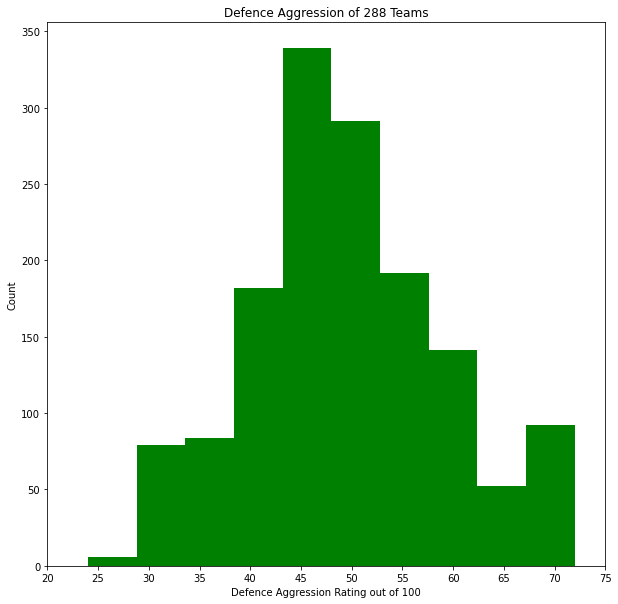

In [28]:
#histogram to depict the distribution of defence aggression
plt.figure(figsize=[10, 10])
plt.hist(team_attributes_df.defenceAggression, color='green', bins=10)
plt.title('Defence Aggression of 288 Teams')
plt.xlabel('Defence Aggression Rating out of 100')
plt.ylabel('Count')
plt.xticks(np.arange(20,80, step=5))
plt.show();

 __75% of the teams have a medium defence aggression(between 48 and 55 or 55 and 50). There are about 100 teams with a high defence aggression(rated 68+). The second largest rating is ?__

In [29]:
#FOR TESTING
#team_attributes_df.team_api_id.nunique()

### Q2: Which players had the best tackles?

In [30]:
#player_attributes_df summary stats.
player_attributes_df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,...,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.00000
mean,91995.886274,166822.125803,137653.145514,68.635317,73.479457,55.142071,49.962136,57.263476,62.486726,49.488927,...,57.868176,54.933448,46.757433,50.354065,48.029342,14.696685,15.947786,20.526304,16.015043,16.32531
std,53092.657914,52821.443279,137599.735284,7.027950,6.581963,17.247231,19.041760,16.478716,14.172493,18.252319,...,15.152408,15.556645,21.226730,21.496289,21.592830,16.841454,15.841297,21.143898,16.070772,17.18545
min,1.000000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,46074.250000,156616.000000,35451.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.00000
50%,92003.500000,183792.000000,80291.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.00000
75%,137935.750000,200138.000000,192841.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.00000
max,183978.000000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,94.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.00000


In [31]:
#merge the player and player attributes
merged_df = player_df.merge(player_attributes_df, how='left', left_on = 'player_api_id', right_on = 'player_api_id', validate = '1:m', suffixes = ('x','y') )
merged_df.head(10)

,idx,player_api_id,player_name,player_fifa_api_idx,birthday,height,weight,idy,player_fifa_api_idy,date,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187.0,1.0,218353.0,2016-02-18,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187.0,2.0,218353.0,2015-11-19,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187.0,3.0,218353.0,2015-09-21,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187.0,4.0,218353.0,2015-03-20,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187.0,5.0,218353.0,2007-02-22,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,2,155782,Aaron Cresswell,189615,1989-12-15,170.18,146.0,6.0,189615.0,2016-04-21,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
6,2,155782,Aaron Cresswell,189615,1989-12-15,170.18,146.0,7.0,189615.0,2016-04-07,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
7,2,155782,Aaron Cresswell,189615,1989-12-15,170.18,146.0,8.0,189615.0,2016-01-07,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
8,2,155782,Aaron Cresswell,189615,1989-12-15,170.18,146.0,9.0,189615.0,2015-12-24,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
9,2,155782,Aaron Cresswell,189615,1989-12-15,170.18,146.0,10.0,189615.0,2015-12-17,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


In [34]:
#group by average per player for all seasons
grouped_data = merged_df.groupby(['player_name']).mean()
grouped_data

,idx,player_api_id,player_fifa_api_idx,height,weight,idy,player_fifa_api_idy,overall_rating,potential,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
player_name,,,,,,,,,,,,,,,,,,,,,
Aaron Appindangoye,1.0,505942.0,218353.0,182.88,187.0,3.0,218353.0,63.600000,67.600000,48.600000,...,53.600000,47.600000,63.800000,66.000000,67.800000,5.600000,10.600000,9.600000,7.600000,7.600000
Aaron Cresswell,2.0,155782.0,189615.0,170.18,146.0,22.0,189615.0,66.969697,74.484848,70.787879,...,57.454545,53.121212,69.393939,68.787879,71.515152,12.181818,8.666667,14.242424,10.363636,12.909091
Aaron Doran,3.0,162549.0,186170.0,170.18,163.0,51.5,186170.0,67.000000,74.192308,68.115385,...,69.384615,60.538462,22.038462,21.115385,21.346154,14.038462,11.807692,17.730769,10.115385,13.500000
Aaron Galindo,4.0,30572.0,140161.0,182.88,198.0,76.0,140161.0,69.086957,70.782609,57.217391,...,53.782609,41.739130,70.608696,70.652174,68.043478,14.173913,11.173913,22.869565,11.173913,10.173913
Aaron Hughes,5.0,23780.0,17725.0,182.88,154.0,100.0,17725.0,73.240000,74.680000,45.080000,...,46.480000,52.960000,77.600000,76.040000,74.600000,8.280000,8.320000,24.920000,12.840000,11.920000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zsolt Low,11073.0,36491.0,111191.0,180.34,154.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zurab Khizanishvili,11074.0,35506.0,47058.0,185.42,172.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zvjezdan Misimovic,11075.0,39902.0,102359.0,180.34,176.0,183973.5,102359.0,80.000000,81.700000,78.200000,...,87.100000,70.900000,26.200000,31.200000,30.000000,9.000000,15.400000,42.100000,16.200000,12.000000


In [51]:
#get the top 10 players with highest average tackles rate
tackles = grouped_data.nlargest(10,['standing_tackle', 'sliding_tackle'])
tackles

,idx,player_api_id,player_fifa_api_idx,height,weight,idy,player_fifa_api_idy,overall_rating,potential,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
player_name,,,,,,,,,,,,,,,,,,,,,
Javier Mascherano,4737.0,38818.0,142754.0,175.26,161.0,78653.0,142754.0,83.880000,85.840000,64.360000,...,74.080000,69.320000,82.720000,90.200000,88.080000,6.480000,12.520000,25.440000,8.800000,8.600000
Giorgio Chiellini,3866.0,41884.0,138956.0,187.96,190.0,64483.0,138956.0,84.555556,86.733333,63.733333,...,50.333333,58.000000,88.533333,88.800000,88.111111,7.933333,8.088889,14.200000,8.488889,9.488889
Nemanja Vidic,7846.0,30865.0,140601.0,190.50,194.0,131138.5,140601.0,85.250000,86.107143,38.107143,...,54.928571,58.607143,86.678571,88.607143,83.642857,11.214286,8.107143,24.178571,10.678571,8.678571
Carles Puyol,1530.0,30661.0,13038.0,177.80,176.0,25477.5,13038.0,85.888889,86.777778,55.777778,...,62.944444,65.777778,89.666667,88.277778,87.166667,11.833333,11.611111,30.055556,12.833333,12.277778
Thiago Silva,10188.0,80562.0,164240.0,182.88,174.0,169817.5,164240.0,83.916667,87.958333,53.500000,...,74.958333,69.666667,86.500000,87.958333,88.333333,9.291667,13.833333,13.208333,11.708333,12.541667
Vincent Kompany,10645.0,39027.0,139720.0,193.04,187.0,177434.5,139720.0,84.142857,87.250000,61.321429,...,68.214286,68.178571,82.785714,87.928571,84.285714,9.142857,11.642857,19.821429,10.857143,9.250000
John Terry,5120.0,30627.0,13732.0,187.96,198.0,84843.0,13732.0,84.703704,85.481481,43.333333,...,60.185185,58.740741,85.814815,87.851852,84.592593,12.444444,8.444444,17.407407,16.222222,10.925926
Sergio Ramos,9699.0,30962.0,155862.0,182.88,165.0,161337.0,155862.0,85.789474,89.421053,73.368421,...,66.368421,65.157895,84.789474,87.684211,89.000000,10.368421,11.368421,27.000000,10.526316,13.473684
Andrea Barzagli,679.0,30902.0,137186.0,187.96,192.0,11466.0,137186.0,83.377778,83.933333,43.911111,...,55.733333,54.311111,87.111111,87.644444,85.288889,7.688889,8.022222,12.177778,8.511111,8.533333


__The best tacklers are shown on the data frame above. They also have good rating for marking and interceptions.__

In [36]:
#FOR TESTING
#mask5 = player_df['player_api_id'] == 41884
#player_df[mask5]

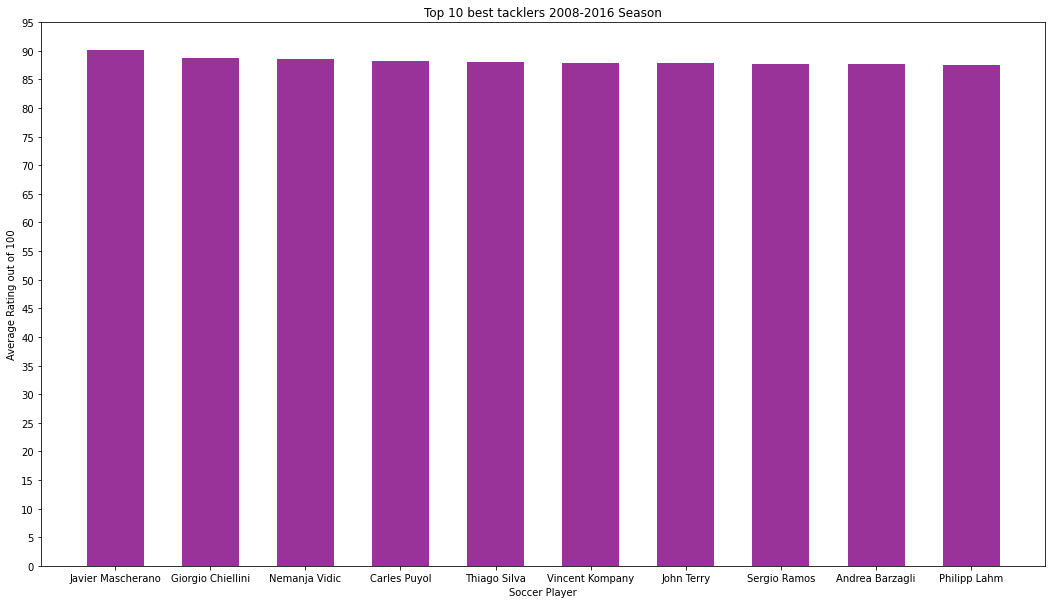

In [37]:
#plot bar graph to show players with high tackles
plt.figure(figsize=[18, 10])
plt.bar(tackles.index, tackles.standing_tackle, color='purple', alpha=0.8, width=0.6)
plt.title('Top 10 best tacklers 2008-2016 Season')
plt.xlabel('Soccer Player')
plt.ylabel('Average Rating out of 100')
plt.yticks(np.arange(0,100, step=5))
plt.show();

__The bar graph shows the top 10 best tacklers for the 2008 to 2016 period. We observe that Javier Mascherano had the hishest tackles over the time.__

In [38]:
#FOR TESTING
#player_df.describe()

In [39]:
#FOR TESTING
#mask6 = player_attributes_df['player_api_id'] == 148325
#player_attributes_df[mask6]

### Q3: What player attributes contribute to the highest defence?

In [40]:
#FOR TESTING
#player_attributes_df.describe()

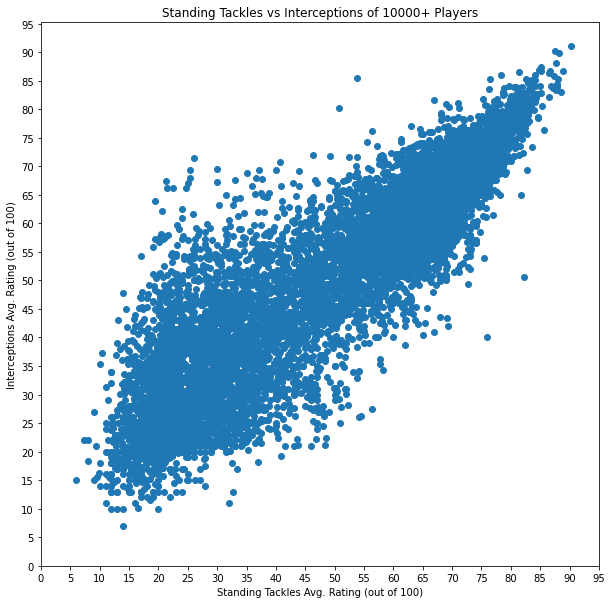

In [56]:
#plotting standing Tackles vs interceptions Averages

plt.figure(figsize=[10, 10])
plt.scatter(grouped_data.standing_tackle, grouped_data.interceptions)
plt.title('Standing Tackles vs Interceptions of 10000+ Players')
plt.xlabel('Standing Tackles Avg. Rating (out of 100)')
plt.ylabel('Interceptions Avg. Rating (out of 100)')
plt.xticks(np.arange(0,100, step=5))
plt.yticks(np.arange(0,100, step=5))
plt.show();

__Standing tackles has a positive correlation with interceptions__. As standing tackles increase, interceptions rates also increase. There is a strong association between the two attributes

In [42]:
#FOR TESTING
#player_attributes_df.aggression.describe()

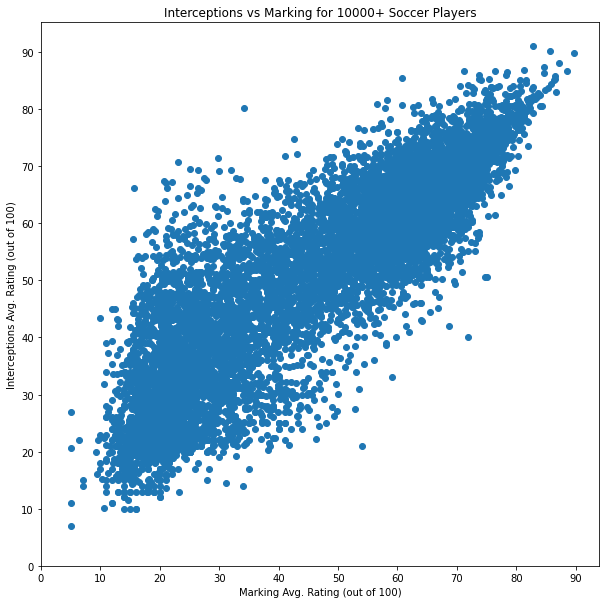

In [57]:
#plotting marking vs interceptions

plt.figure(figsize=[10, 10])
plt.scatter(grouped_data.marking, grouped_data.interceptions)
plt.title('Interceptions vs Marking for 10000+ Soccer Players')
plt.xlabel('Marking Avg. Rating (out of 100)')
plt.ylabel('Interceptions Avg. Rating (out of 100)')
plt.xticks(np.arange(0,100, step=10))
plt.yticks(np.arange(0,100, step=10))
plt.show();

__Marking has a positive correlation with interceptions__. As interceptions increase, marking rates also increase. There is a strong association between the two attributes

<a id='close'></a>
# Conclusion

Odra Wodzisław team had the most aggressive defence with an average rating of 70 over the 2008 to 2016 period. There are about 100 teams with a rating of 68+ for defence aggression. There is no way to connect the player and team datasets. If that was the case, it would be possible to get the teams with the highest overall defence rating using the player attributes.

<br>
Player attributes: standing tackles, marking and interceptions have a strong association and they can be used to find trends in team and player defence.


In [11]:
#Close connection
connection.close()

<a id='reference'></a>
# References